In [26]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import sin, cos, pi, linspace

In [24]:
days_lived_list=range(1, 101)

host_loc= [0,250]
mosquito_radius= 50
host_found=0
runs_list=[1000]
initial_state= [0,0]
smell_during_flight= True
check_last_day_limit= False
plot_intersection = True

In [6]:
def plot_points(points):
    points= np.array(points)
    fig, ax = plt.subplots()
    ax.scatter(points[...,0], points[...,1])
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    plt.show()

In [ ]:
dist:  17.60896398814647
-233.39510662430038 89.59198738632512 -17995.75584954466


[-152.5410795127401, -196.51964624913083] [-242.13306689906523, -429.9147528734312]

In [46]:
((89*250)+(-17995))/ math.sqrt((152**2)+(196**2))

17.155026806549152

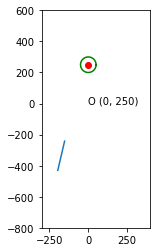

In [51]:
        x= [-152.5410795127401, -196.51964624913083]
        y=[-242.13306689906523, -429.91]
        plt.plot(0,250, color = 'red', marker = 'o')
        plt.gca().annotate('O (0, 250)', xy=(0 + 0.1, 0 + 0.1), xycoords='data', fontsize=10)

        #draw a circle
        angles = linspace(0 * pi, 2 * pi, 100 )
        r=50
        xs = r*cos(angles)
        ys = 250+r*sin(angles)
        plt.plot(xs, ys, color = 'green')
        plt.xlim(-300, 400)
        plt.ylim(-800, 600)
        plt.gca().set_aspect('equal')
        plt.plot(x,y)
        plt.show()

In [82]:
def check_intersection(curr_state, new_state):
    #equation of line standar form A, B and C
    A= new_state[1] - curr_state[1]
    B= - (new_state[0] - curr_state[0])
    C= - ( (A*curr_state[0]) + (B*curr_state[1]) )

    #find perpendicular distance to host_location
    dist= (abs((A*host_loc[0]) + (B*host_loc[1])+ C)) / (math.sqrt(A*A + B*B))

    if dist <= mosquito_radius and plot_intersection:
        #plot line with host_location circle
        plt.plot(0,250, color = 'red', marker = 'o')
        plt.gca().annotate('O (0, 250)', xy=(0 + 0.1, 0 + 0.1), xycoords='data', fontsize=10)

        #draw a circle
        angles = linspace(0 * pi, 2 * pi, 100 )
        r=50
        xs = r*cos(angles)
        ys = 250+r*sin(angles)
        plt.plot(xs, ys, color = 'green')
        plt.xlim(-100, 200)
        plt.ylim(100, 400)
        plt.gca().set_aspect('equal')
        plt.plot([curr_state[0], new_state[0]],[curr_state[1], new_state[1]])
        plt.show()
        print(curr_state, new_state, dist)

        print(curr_state-50, new_state, dist)

    return dist <= mosquito_radius

    

In [78]:
def find_host(curr_state):
    dist= np.linalg.norm(np.array(curr_state) - np.array(host_loc))
    return dist<=mosquito_radius

def red_region_limit(last_day_state):
    dist= np.linalg.norm(np.array(last_day_state) - np.array(initial_state))
    return dist>1000

def run_simulation(host_found, die_outside, n_runs, days_lived):
    for runs in range(n_runs):
        curr_state=[0,0]
        points= [curr_state]
        for day in range(days_lived):
            smell= find_host(curr_state) # return True/False
            if smell:
                host_found+=1
                break
            
            angle= np.random.randint(0, 360)
            x = curr_state[0]+ (250 * np.sin(math.radians(angle)))
            y = curr_state[1]+ (250 * np.cos(math.radians(angle)))

            if smell_during_flight and check_intersection(curr_state, [x,y]):
                #find if line intersects or is tangent to the yellow circle of radius 50m centered at (0,250)
                #compare perpendicular distance between the center of the circle and the line to the radius of the circle
                #p=r : touches the circle , p<r: line intersects the circle
                print("intersected.. ", day)
                host_found+=1
                return host_found, die_outside

            #check if mosquito is outside 1000m radius in the last_day 
            if check_last_day_limit and day==days_lived-1:
                out= red_region_limit(curr_state)
                if out:
                    die_outside+=1

            #verify if the dist between prev and next location is within 250m
            dist= round(np.linalg.norm(np.array([x,y]) - np.array(curr_state)),3)
            if dist >250:
                print(f"dist > 250 {dist} for runs {runs}")
                print("curr state: ", curr_state , [x,y])
                print("Exiting...")
                exit()
            curr_state= [x,y]
            points.append(curr_state)

    return host_found, die_outside



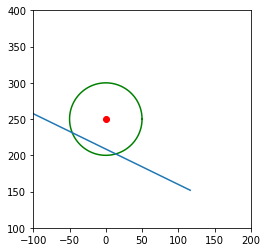

[116.48145657226698, 151.80158967047936] [-108.21705500252477, 261.3943763677487] 37.198036862969
intersected..  2


In [97]:

host_found_wrt_days1=[]
die_outside_list= []

for n_runs in runs_list:
    for days_lived in [10]:
        #print("days lived: ", days_lived)
        #if days_lived%10==0:
        #    print("days passed: ", days_lived)
        
        host_found=0 
        die_outside=0
        host_found, die_outside= run_simulation(host_found, die_outside, n_runs, days_lived)

        #print("host_found: ", host_found, host_found/n_runs)
        
        host_found_wrt_days1.append(host_found/n_runs)
        die_outside_list.append(die_outside/n_runs)


In [37]:
len(host_found_wrt_days)

100

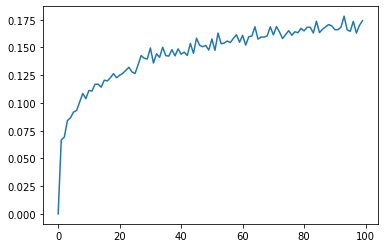

In [38]:
plt.plot(np.array(host_found_wrt_days))